# IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# READING THE FILE

In [2]:
df=pd.read_csv('E:\DA_PROJECTS\SAMPLE_PRO\gold.csv')
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [3]:
#DISPLAYING FIRST 5 ENTRIES
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#DISPLAYING LAST 5 ENTRIES
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
#SHOWING TOTAL NUMBER OF ENTRIES
len(df)

2290

In [6]:
#DISPLAYING THE INFORMATION ABOUT TABLE DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#DISPLAIYNG NUMBER OF ROWS AND COLUMNS
df.shape

(2290, 6)

In [8]:
#CHECKING ON PRESENCE OF NULL VALUE
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#STATISTICAL DESCRIPTION OF THE DATA
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SPX,2290.0,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.0,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.0,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.0,20.084997,7.092566,8.850000,15.570000,17.268500,22.882500,47.259998
EUR/USD,2290.0,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798


# CREATING CORRELATION BETWEEN PARAMETERS

In [10]:
correlation=df.corr()

<AxesSubplot:>

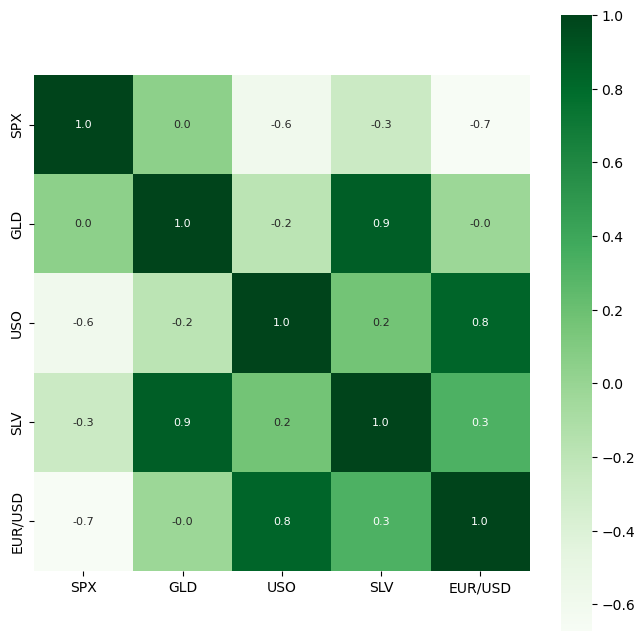

In [11]:
#PLOTTING THE CORRELATION
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True,square=True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Greens')

In [12]:
#PRINTING THE CORRELATION OF 'GOLD' WITH RESPECT TO OTHER PARAMETERS
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


# VISUALIZATION OF DATA USING SEABORN

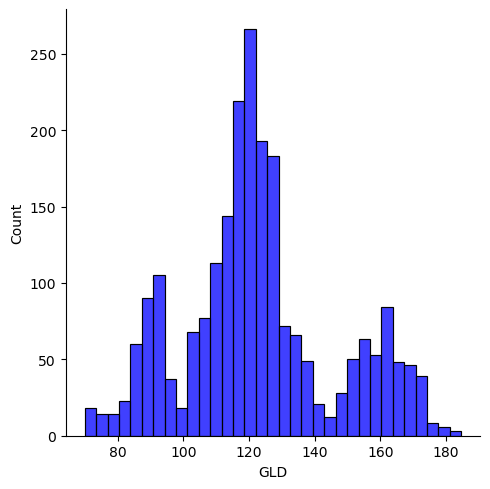

In [13]:
#PLOTTING THE PRICE OF GOLD
sns.displot(df['GLD'],color='Blue')

E:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

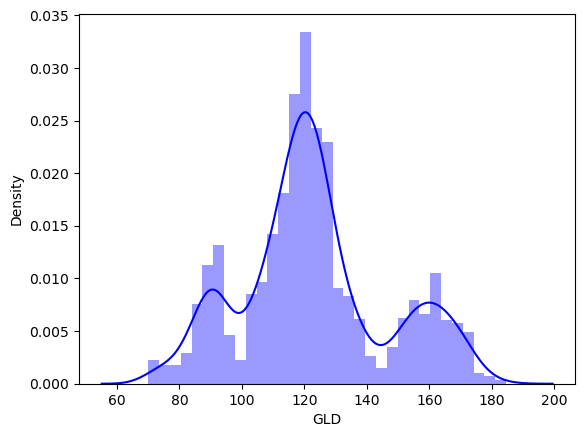

In [14]:
#PLOTTING GOLD PRICE WITH RESPECT TO IT'S DENSITY
sns.distplot(df['GLD'],color='Blue')

In [15]:
#EXTRACTING THE REQUIRED COLUMNS
x=df.drop(['Date','GLD'],axis=1)
y=df['GLD']

# SPLITTING OF TEST AND TRAINING DATASET

In [16]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

# RANDOM FOREST REGRESSOR MODEL

In [17]:
regressor=RandomForestRegressor(n_estimators=100)

In [18]:
#TRAINING MODEL DATA
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [19]:
#PREDICTION ON TEST DATA
test_data_prediction=regressor.predict(x_test)

In [20]:
print(test_data_prediction)

[168.29239932  81.94169967 116.43610031 127.64070065 120.8402012
 154.73449705 150.48799877 125.95150048 117.42259871 126.05410054
 116.60540112 171.60550093 141.51659845 167.68049773 114.97830034
 117.91690056 137.9091034  170.10470099 159.03540263 158.89509909
 155.0329002  125.04080029 175.43159921 157.00430348 125.13930055
  93.83349981  77.45630004 120.91330009 119.18179977 167.55150037
  88.11040045 125.40810005  90.96020068 117.82050002 121.12469966
 136.39200077 115.53060159 115.00260092 147.86270007 107.43520095
 104.71400251  87.0714979  126.4598007  117.9535001  152.56709921
 119.68630037 108.45079963 108.37759869  93.25510043 127.12489747
  75.06800029 113.63909924 121.2445999  111.16169894 118.9084991
 120.63499934 158.69650014 168.73040087 147.01949672  85.80009847
  94.33180038  86.79369874  90.54280043 119.17820061 126.37210088
 127.46540029 168.51550028 122.22419939 117.34849884  98.46700017
 168.03720056 143.06279806 132.26650222 121.23900214 121.22339965
 119.8518004

In [21]:
#R squared error
error_score=metrics.r2_score(y_test,test_data_prediction)
print("ERROR PERCENTAGE = ",error_score)

ERROR PERCENTAGE =  0.9890733318194944


# COMPARING ACTUAL AND PREDICTED VALUES

In [22]:
#CONVERTING DATA INTO LIST TYPE
y_test=list(y_test)

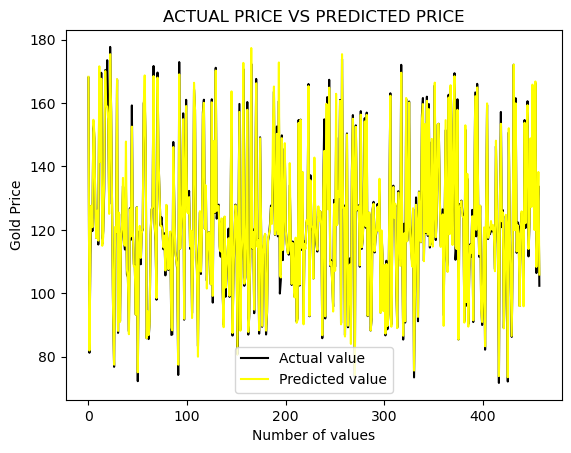

In [23]:
#VISUALIZATION OF ACTUAL AND PREDICTED  GOLD PRICE
plt.plot(y_test,color='black',label='Actual value')
plt.plot(test_data_prediction,color='yellow',label='Predicted value')
plt.title('ACTUAL PRICE VS PREDICTED PRICE')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()